In [6]:
import os
import pandas as pd
import numpy as np
import env
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import wrangle as w
import matplotlib.pyplot as plt
from scipy import stats
import sklearn.preprocessing

In [84]:
train, validate, test = w.wrangle_zillow()

In [91]:
train.shape, validate.shape, test.shape

((1198531, 7), (513657, 7), (428047, 7))

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198531 entries, 1320455 to 366825
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   bed_count    1198531 non-null  int64  
 1   bath_count   1198531 non-null  int64  
 2   sqr_ft       1198531 non-null  int64  
 3   tax_val_usd  1198531 non-null  int64  
 4   yearbuilt    1198531 non-null  int64  
 5   taxamount    1198531 non-null  float64
 6   fips         1198531 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 73.2 MB


#### Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [94]:
#make a copy of the df so we don't mess with the original
train_scaled = train.copy()

In [95]:
# make, fit, use:
columns_to_scale = ['bed_count', 'bath_count', 'sqr_ft', 'taxamount']
# make the object, put it into the variable scaler
scaler = sklearn.preprocessing.MinMaxScaler()
# fit the object to my data:
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [96]:
#take a look at our scaled data
train_scaled.head()

,bed_count,bath_count,sqr_ft,tax_val_usd,yearbuilt,taxamount,fips
1320455,0.166667,0.10,0.001168,440101,1960,0.006355,6037
1378363,0.166667,0.10,0.001601,566508,1956,0.008225,6111
1439668,0.277778,0.15,0.002230,530517,1970,0.008416,6037
308728,0.166667,0.10,0.002329,136904,1961,0.002697,6037
1145181,0.166667,0.10,0.001304,120497,1971,0.002044,6037


Text(0.5, 1.0, 'Scaled')

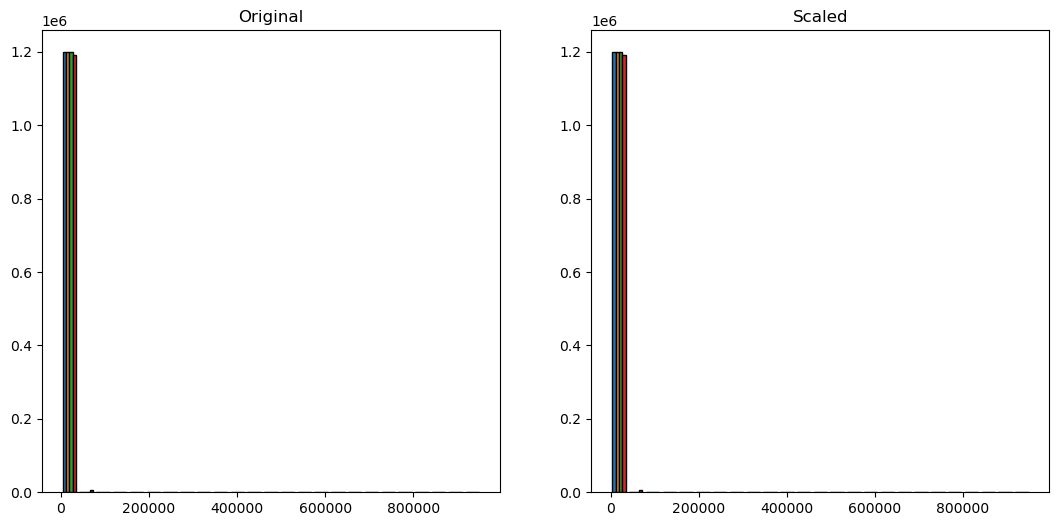

In [97]:
#minmax for all columns that we are going to scale
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train[columns_to_scale], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train[columns_to_scale], bins=25, ec='black')
plt.title('Scaled')

In [117]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    '''
    This function takes in a specific scaler, dataframe, 
    and returns two visuals of that data,
    one prior to scaling and one after scaling
    '''
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
    plt.show()

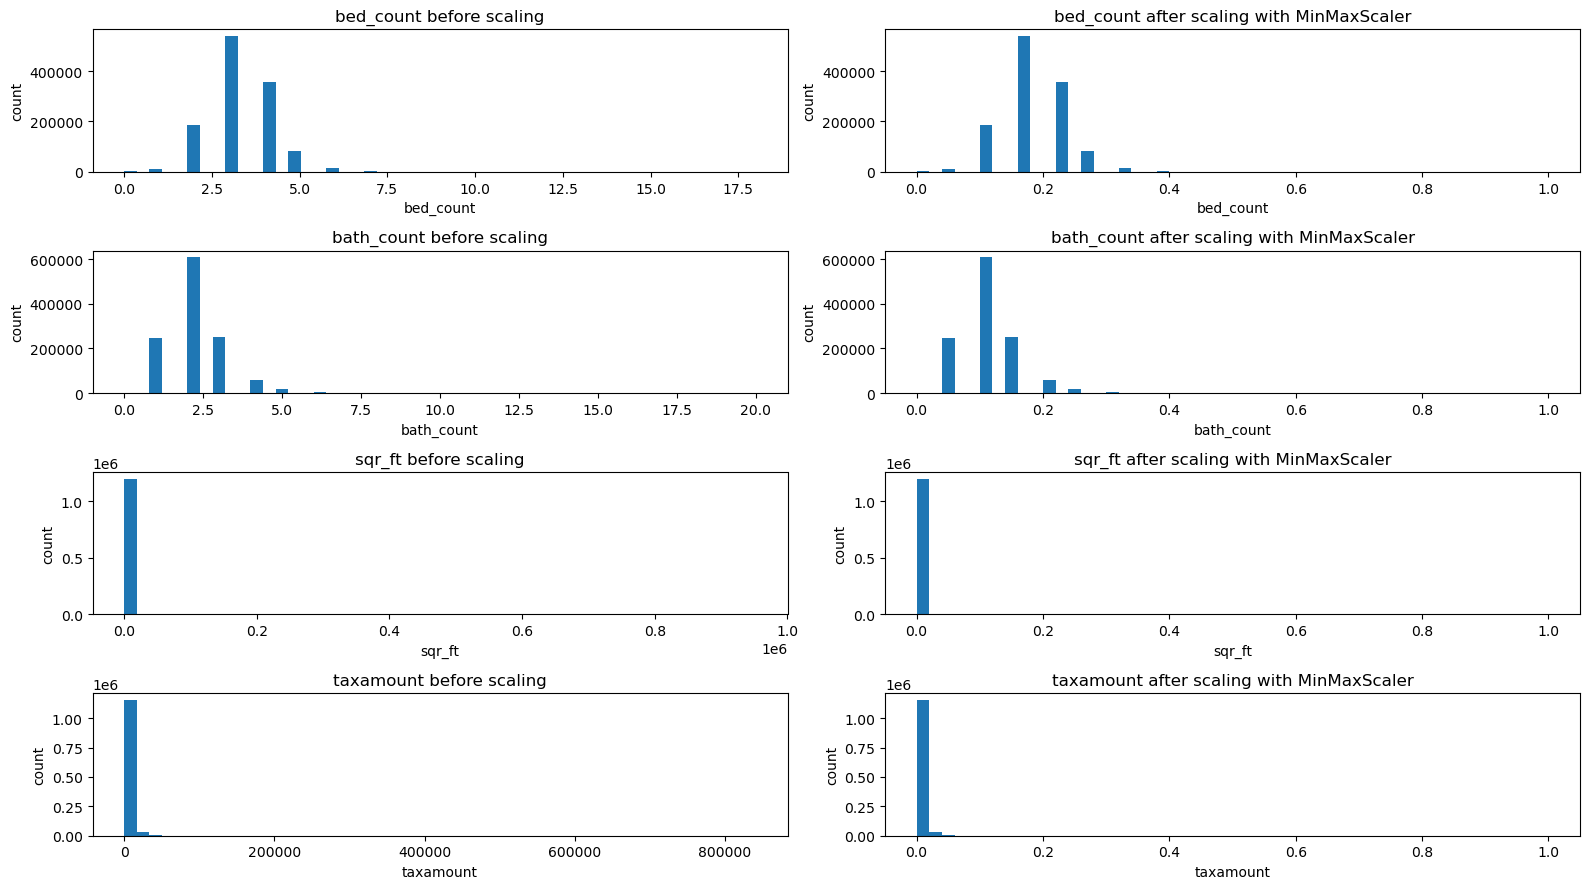

In [118]:
#we can use the function we just created on MinMaxScaler
visualize_scaler(scaler = sklearn.preprocessing.MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

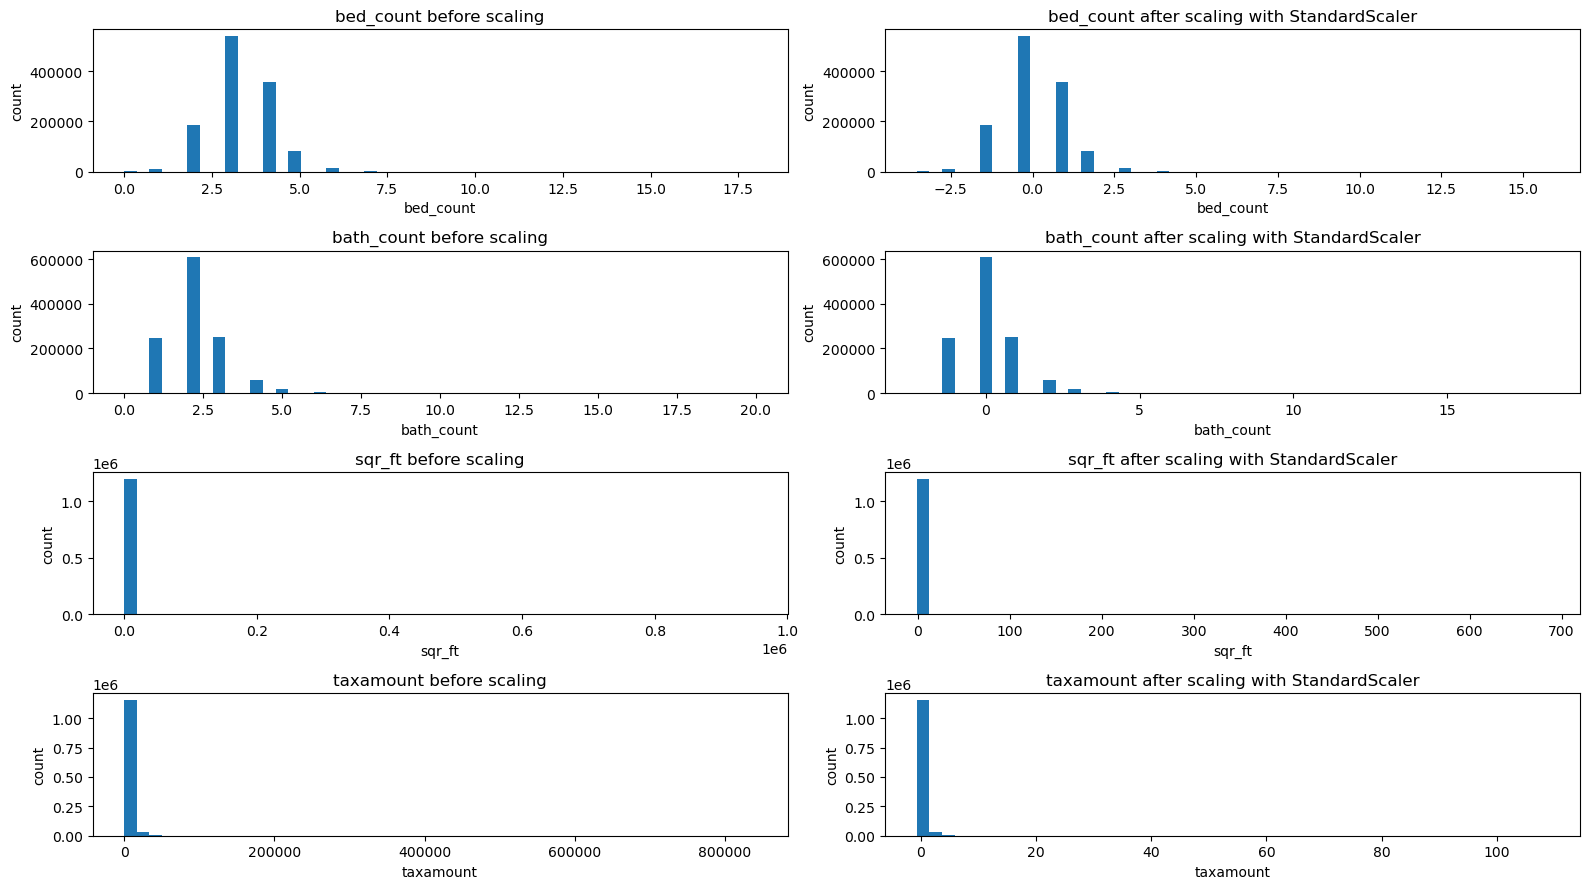

In [101]:
#Now, let's use it on StandarScaler
visualize_scaler(scaler = sklearn.preprocessing.StandardScaler(),
                 df=train, columns_to_scale=columns_to_scale, bins=50)

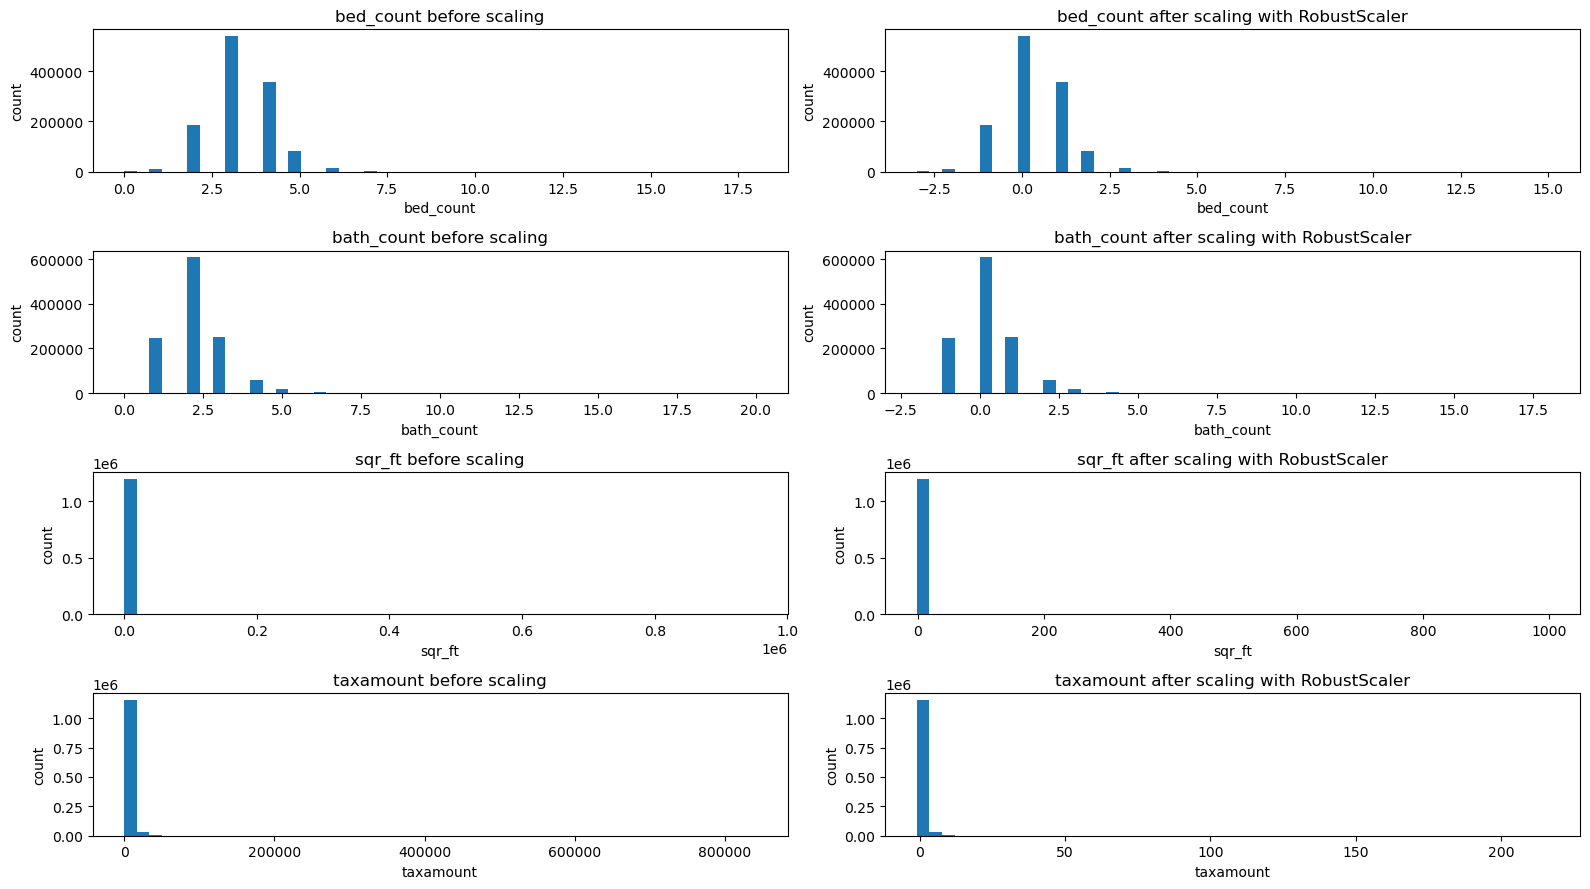

In [102]:
#Now, let's use it on RobustScaler
visualize_scaler(scaler = sklearn.preprocessing.RobustScaler(),
                 df=train, columns_to_scale=columns_to_scale, bins=50)

#### Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [103]:
def vis_scaler_inverse(scaler, df, columns_to_scale, bins=10):
    '''
    This function takes in a specific scaler, dataframe, 
    and returns two visuals of that data,
    one prior to scaling and one after scaling
    '''
    fig, axs = plt.subplots(len(columns_to_scale), 3, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    df_inverse = df.copy()
    df_inverse[columns_to_scale] = scaler.inverse_transform(df[columns_to_scale])

    for (ax1, ax2, ax3), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
        ax3.hist(df_inverse[col], bins=bins)
        ax3.set(title=f'{col} after inverse transform {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

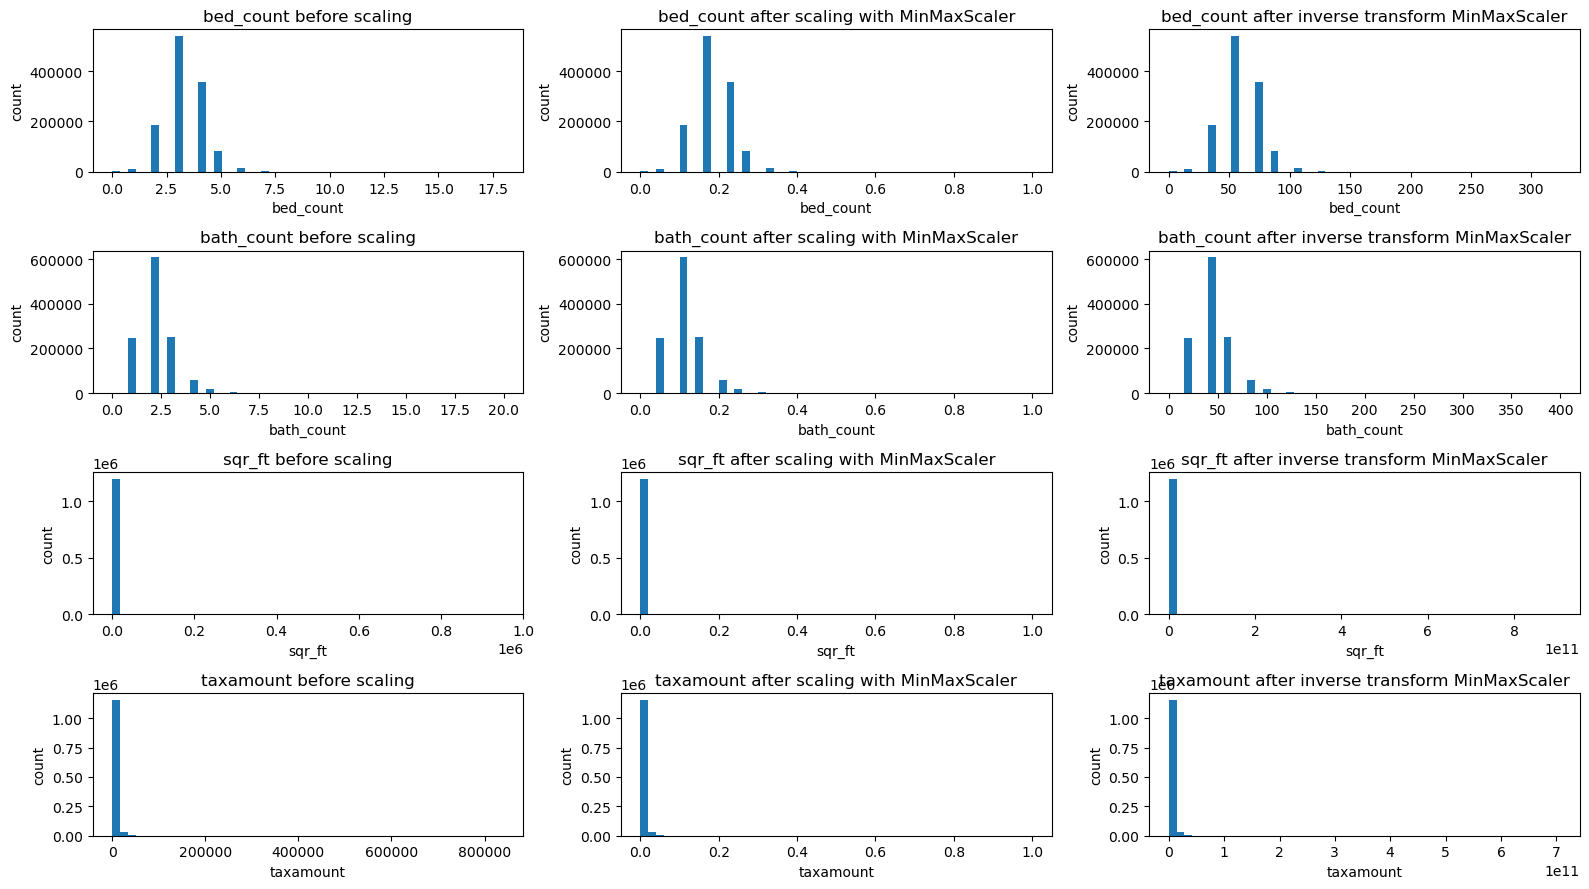

In [106]:
#Use the new function on MinMaxScaler to visualize all three:
## original, scaled, and inverse
vis_scaler_inverse(scaler = sklearn.preprocessing.MinMaxScaler(), 
                 df=train, columns_to_scale=columns_to_scale, bins=50)

#### Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

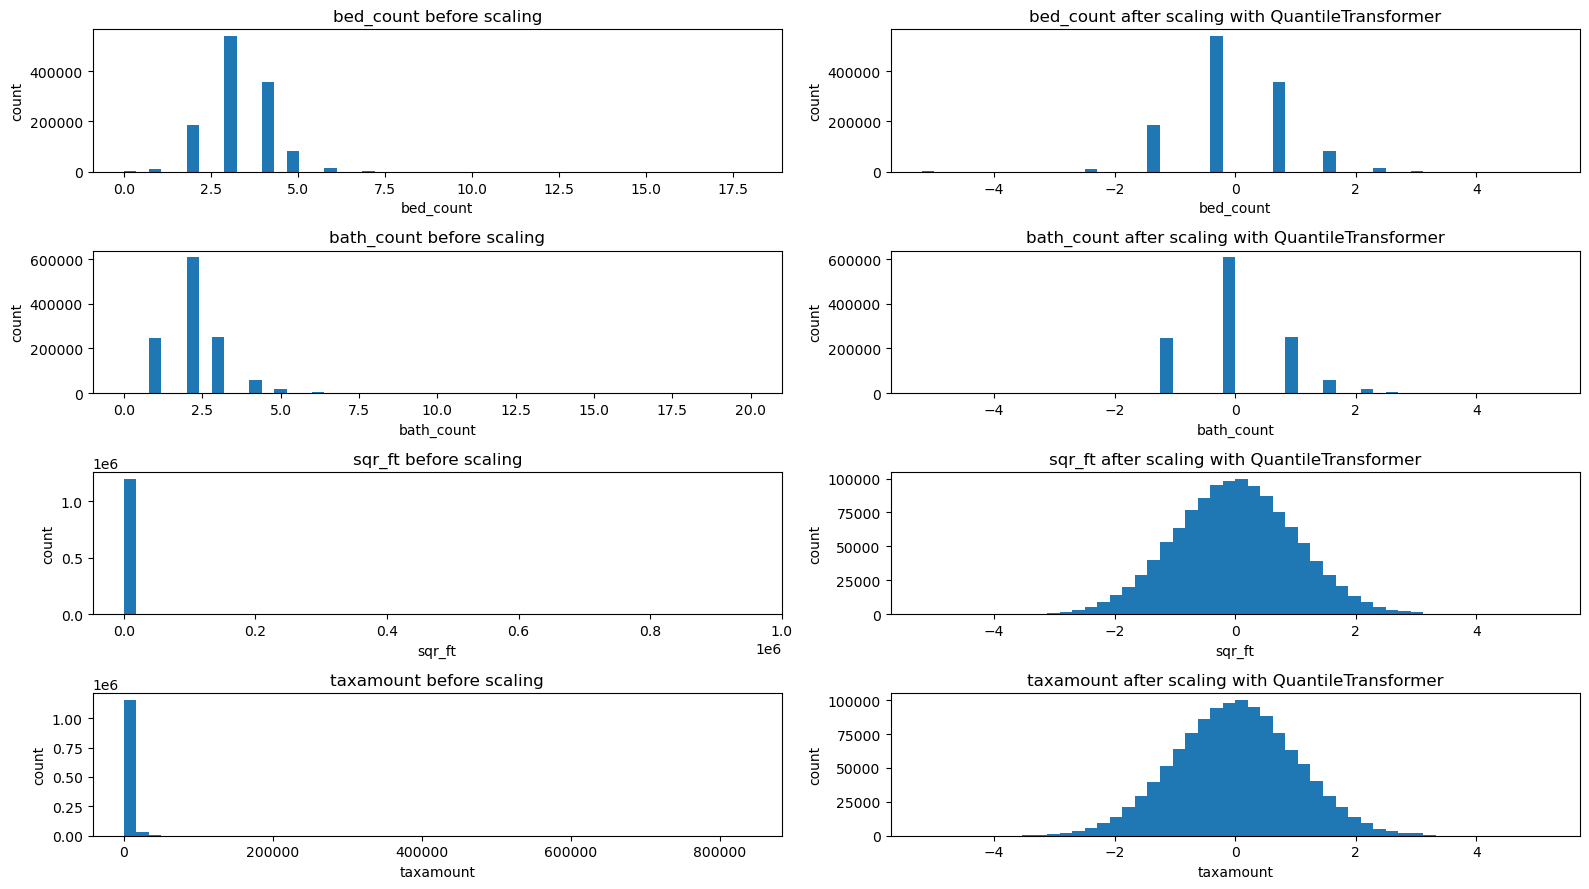

In [107]:
visualize_scaler(sklearn.preprocessing.QuantileTransformer(output_distribution = 'normal'), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

#### Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

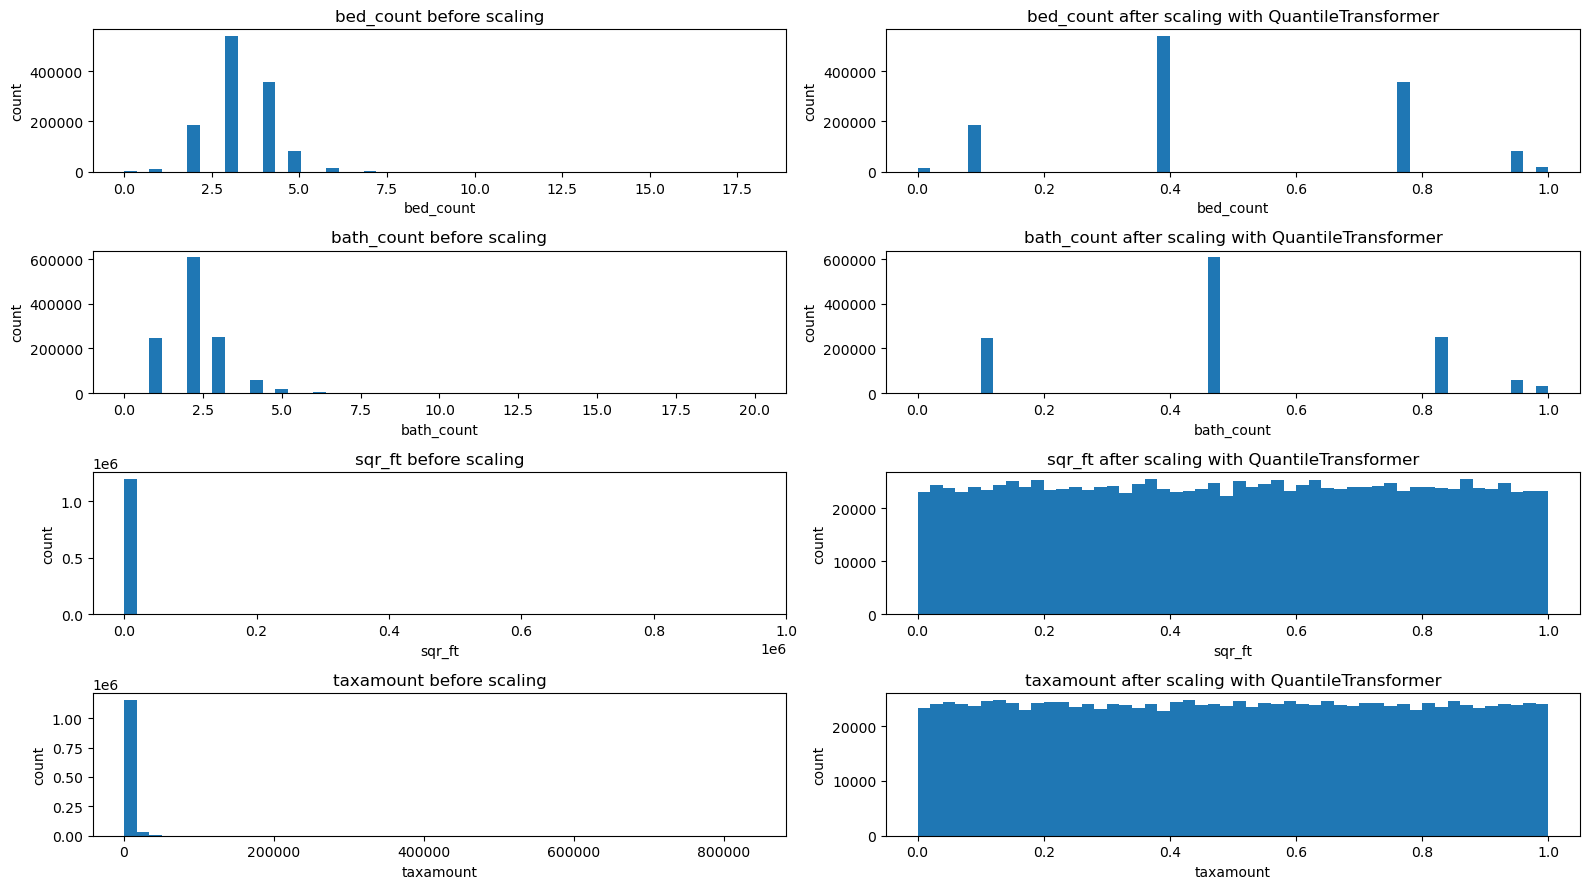

In [109]:
# Let's use our function on QuantileTransformer without output kwarg
visualize_scaler(scaler=sklearn.preprocessing.QuantileTransformer(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

#### Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [114]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bed_count', 'bath_count', 'sqr_ft', 'taxamount'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = sklearn.preprocessing.MinMaxScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [115]:
#Let's assign our new function to the appropriate variables
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)

In [116]:
#call our new dataframe
train_scaled.head()

,bed_count,bath_count,sqr_ft,tax_val_usd,yearbuilt,taxamount,fips
1320455,0.166667,0.10,0.001168,440101,1960,0.006355,6037
1378363,0.166667,0.10,0.001601,566508,1956,0.008225,6111
1439668,0.277778,0.15,0.002230,530517,1970,0.008416,6037
308728,0.166667,0.10,0.002329,136904,1961,0.002697,6037
1145181,0.166667,0.10,0.001304,120497,1971,0.002044,6037
